In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [2]:
data = []
for i in range(50, 0, -1):
    data.append([-i, -1])
for i in range(0, 51):
    data.append([i, 1])     
data = np.array(data)

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def logistic_loss(x, y, w):
    z = w.T * (y * x)
    return (-np.log(sigmoid(z))).sum()

def logistic_grad(x, y, w):
    z = w.T * (y * x)
    g = y * x * (sigmoid(z) - 1)
    return g.sum()

### 1c)

Step 1 Loss: 2551.728267394831
Step 11 Loss: 0.6931471806064605
Step 21 Loss: 0.6931471806064605
Step 31 Loss: 0.6931471806064605
Step 41 Loss: 0.6931471806064605
Step 51 Loss: 0.6931471806064605
Step 61 Loss: 0.6931471806064605
Step 71 Loss: 0.6931471806064605
Step 81 Loss: 0.6931471806064605
Step 91 Loss: 0.6931471806064605
Final Weights: [24.48438399] with loss: 0.6931471806064605
Accuracy: 1.0


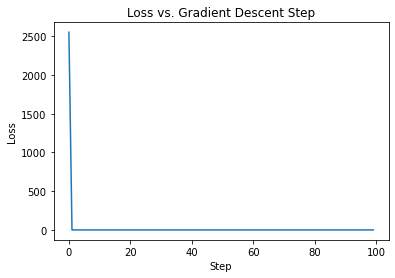

In [4]:
N = 100
x = data[:, 0]
y = data[:, 1]
w = np.array([-1], dtype='float64')
learning_rate = 0.01

# gd
loss = []
for i in range(N):
    l = logistic_loss(x, y, w)
    loss.append(l)
    if i % 10 == 0:
        print(f'Step {i+1} Loss: {l}')
    w -= learning_rate * logistic_grad(x, y, w)
print(f'Final Weights: {w} with loss: {logistic_loss(x, y, w)}')

# test on train
pred = w.T * x
pred[pred >= 0] = 1
pred[pred < 0] = -1
print(f'Accuracy: {(pred == y).sum() / len(y)}')

# plot loss
plt.title("Loss vs. Gradient Descent Step")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.plot(np.arange(N), loss)
# plt.savefig('uncorrupted_data.pdf')

### 1d)

Step 1 Loss: 2071.728267394831
Step 11 Loss: 986.6340579711433
Step 21 Loss: 2422.7615081541817
Step 31 Loss: 3993.5708929956504
Step 41 Loss: 5607.860951797053
Step 51 Loss: inf
Step 61 Loss: inf
Step 71 Loss: 8572.209197348482
Step 81 Loss: 2360.1814236757855
Step 91 Loss: 952.8029409279503
Final Weights: [4.97695138] with loss: 2389.6436483200946
Accuracy: 0.900990099009901


<ipython-input-3-b19b317b4073>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
<ipython-input-3-b19b317b4073>:6: RuntimeWarning: divide by zero encountered in log
  return (-np.log(sigmoid(z))).sum()


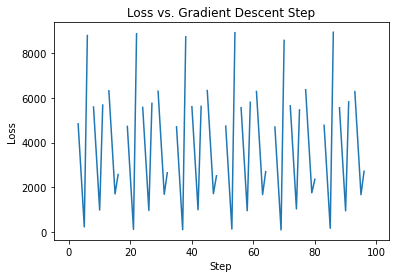

In [5]:
N = 100
x = data[:, 0]
y = data[:, 1]
w = np.array([-1], dtype='float64')
learning_rate = 0.01

# corrupt labels
for i in range(5):
    y[i] = -y[i]
    y[-(i+1)] = -y[-(i+1)]

# gd
loss = []
for i in range(N):
    l = logistic_loss(x, y, w)
    loss.append(l)
    if i % 10 == 0:
        print(f'Step {i+1} Loss: {l}')
    w -= learning_rate * logistic_grad(x, y, w)
print(f'Final Weights: {w} with loss: {logistic_loss(x, y, w)}')

# test on train
pred = w.T * x
pred[pred >= 0] = 1
pred[pred < 0] = -1
print(f'Accuracy: {(pred == y).sum() / len(y)}')

# plot loss
plt.title("Loss vs. Gradient Descent Step")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.plot(np.arange(N), loss)
# plt.savefig('./corrupted_data.pdf')

# Problem 3

### 3c) and 3d)

In [6]:
import time

np.random.seed(42)

In [7]:
def distance(x, x_opt):
    return np.linalg.norm(x - x_opt)

def least_squares_loss(A, x, b):
    return np.linalg.norm(A @ x - b) ** 2

def grad_least_squares(A, x, b):
    return 2 * A.T @ (A @ x - b)

In [8]:
N = 500
M = 2 * N
A = np.random.uniform(-1, 1, (M, N))
x_ = np.random.uniform(-1, 1, (N, 1))
eta = np.random.normal(0, np.sqrt(0.5), (M, 1))
b = A @ x_ + eta

steps = 50
learning_rate = 0.1
x = np.zeros((N, 1))
    
# gd
t0 = time.time()
loss = []
for i in range(steps):
    l = least_squares_loss(A, x, b)
    loss.append(l)
    if i % 10 == 0:
        print(f'Step {i+1} Loss: {l} Distance: {distance(x, x_)}')
    x -= learning_rate * grad_least_squares(A, x, b) / N
t1 = time.time()

print(f'Total Runtime: {t1-t0}s')
print(f'Distance: {distance(x, x_)} and function value (loss): {least_squares_loss(A, x, b)}')
# print(f'Final Weights: {x}')

Step 1 Loss: 55200.55808738034 Distance: 12.45749945321344
Step 11 Loss: 3740.6305619631544 Distance: 5.473966708815552
Step 21 Loss: 1349.0038147195546 Distance: 3.7412149348709374
Step 31 Loss: 748.3311176577138 Distance: 2.847989748659782
Step 41 Loss: 513.4947356403671 Distance: 2.299325621336059
Total Runtime: 0.2768430709838867s
Distance: 1.9376791521889782 and function value (loss): 401.06615089540537


In [9]:
t0 = time.time()
x_opt = np.linalg.inv(A.T @ A) @ A.T @ b
t1 = time.time()
print(f'Total Runtime: {t1-t0}s')
print(f'Distance: {distance(x_opt, x_)} and function value (loss): {least_squares_loss(A, x_opt, b)}')
# print(f'Optimal x: {x_}')

Total Runtime: 0.06595945358276367s
Distance: 1.2380641658266132 and function value (loss): 241.14989308739894


# Problem 4

In [10]:
def f(x, y, n):
    return x**2 + y**2 + 1 - (x * ((n+1)/n)) + (((n+1) * (2*n+1))/ (6 * n**2))

def grad_(x, y, a, b):
    return np.array([2 * (x - a), 2 * (y - b)])

### 4c)

In [11]:
N = 100
a = []
b = []
for i in range(2 * N):
    if i < N:
        a.append(i/N)
        b.append(-1)
    else:
        a.append((i-N)/N)
        b.append(1)
a = np.array(a)
b = np.array(b)

### lr = 0.1

Final Loss: 1.4197038070661232 with Values x, y: 0.5983540688834736, -0.5724192736875855


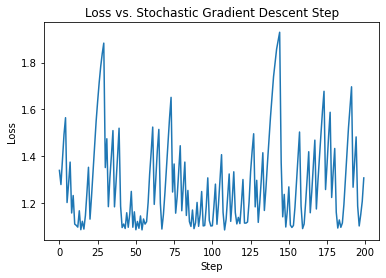

In [12]:
x = 0
y = 0

steps = 200
learning_rate = 0.1
    
# gd
loss = []
for t in range(steps):
    a_t = np.random.choice(a)
    b_t = np.random.choice(b)
    l = f(x, y, N)
    loss.append(l)
    if i % 100 == 0:
        print(f'Step {t+1} Loss: {l}')
    grad = learning_rate * grad_(x, y, a_t, b_t)
    x -= grad[0]
    y -= grad[1]

print(f'Final Loss: {f(x, y, N)} with Values x, y: {x}, {y}')

# plot loss
plt.title("Loss vs. Stochastic Gradient Descent Step")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.plot(np.arange(steps), loss)
# plt.savefig('./sgd1.PDF')

### lr = 0.1/(t+1)

Final Loss: 1.110173295372831 with Values x, y: 0.3413372004116079, -0.007923597902526653


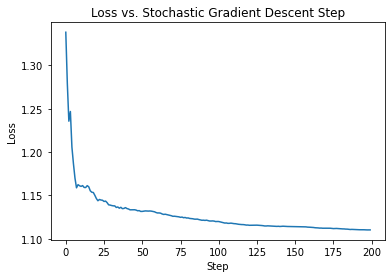

In [13]:
x = 0
y = 0

steps = 200
learning_rate = 0.1
    
# gd
loss = []
for t in range(steps):
    learning_rate = 0.1/(t+1)
    a_t = np.random.choice(a)
    b_t = np.random.choice(b)
    l = f(x, y, N)
    loss.append(l)
    if i % 100 == 0:
        print(f'Step {t+1} Loss: {l}')
    grad = learning_rate * grad_(x, y, a_t, b_t)
    x -= grad[0]
    y -= grad[1]

print(f'Final Loss: {f(x, y, N)} with Values x, y: {x}, {y}')

# plot loss
plt.title("Loss vs. Stochastic Gradient Descent Step")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.plot(np.arange(steps), loss)
# plt.savefig('./sgd2.PDF')

### lr = 0.1/root(t+1)

Final Loss: 1.0839912051258875 with Values x, y: 0.5132597526324921, 0.024453662554668798


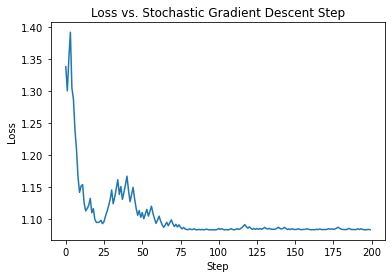

In [14]:
x = 0
y = 0

steps = 200
learning_rate = 0.1
    
# gd
loss = []
for t in range(steps):
    learning_rate = 0.1/np.sqrt(t+1)
    a_t = np.random.choice(a)
    b_t = np.random.choice(b)
    l = f(x, y, N)
    loss.append(l)
    if i % 100 == 0:
        print(f'Step {t+1} Loss: {l}')
    grad = learning_rate * grad_(x, y, a_t, b_t)
    x -= grad[0]
    y -= grad[1]

print(f'Final Loss: {f(x, y, N)} with Values x, y: {x}, {y}')

# plot loss
plt.title("Loss vs. Stochastic Gradient Descent Step")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.plot(np.arange(steps), loss)
# plt.savefig('./sgd3.PDF')